In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('household_power_consumption.txt', sep=';',parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'],index_col='dt')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13628\1475348433.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data= pd.read_csv('household_power_consumption.txt', sep=';',parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'],index_col='dt')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13628\1475348433.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data= pd.read_csv('household_power_consumption.txt', sep=';',parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'],index_col='dt')


In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
data.shape

(2075259, 7)

In [6]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
data.ffill(axis=0,inplace=True)

In [9]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
eq1 = (data['Global_active_power']*1000/60) 
eq2 = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']
data['power_consumption'] = eq1 - eq2

In [11]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [12]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption'],
      dtype='object')

In [13]:
data['Date'] = data.index.date
data['time'] = data.index.time

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   power_consumption      float64       
 8   Date                   datetime64[ns]
 9   time                   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 174.2+ MB


In [16]:
data=data[data.index.year>2006]

In [17]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Date,time
dt,,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,43.000000,2007-01-01,00:00:00
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,42.533333,2007-01-01,00:01:00
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:02:00
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:03:00
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,42.566667,2007-01-01,00:04:00


In [19]:
data.shape

(2053263, 10)

In [21]:
df_data = data.drop('time', axis=1).groupby(['Date']).sum()

In [22]:
df_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,14243.933333
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,11791.900000
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,34779.533333
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,35758.733333


In [23]:
df_data.shape

(1426, 8)

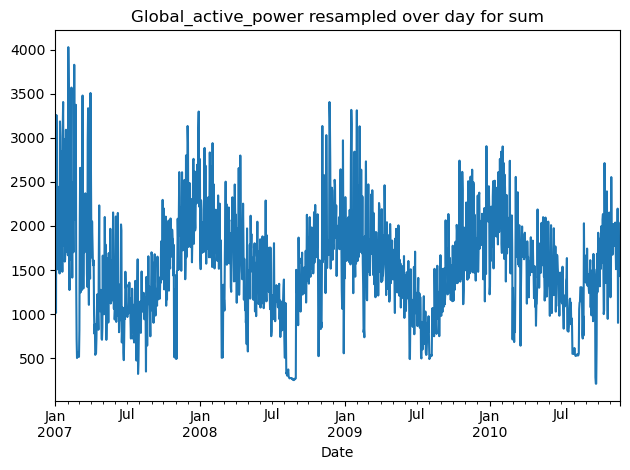

In [29]:
df_data.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

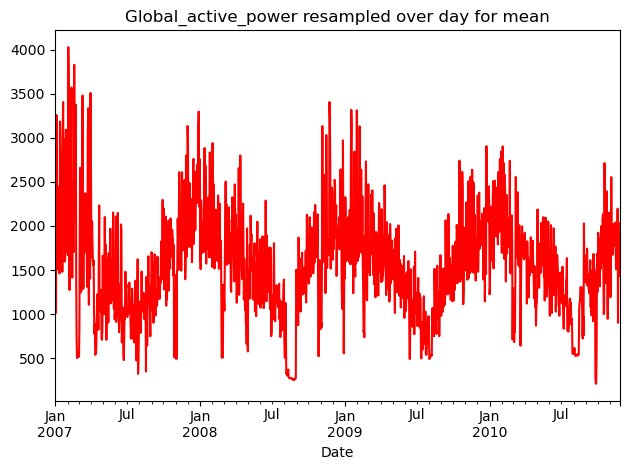

In [30]:
df_data.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

In [31]:
active_power_df = data['Global_active_power'].copy()

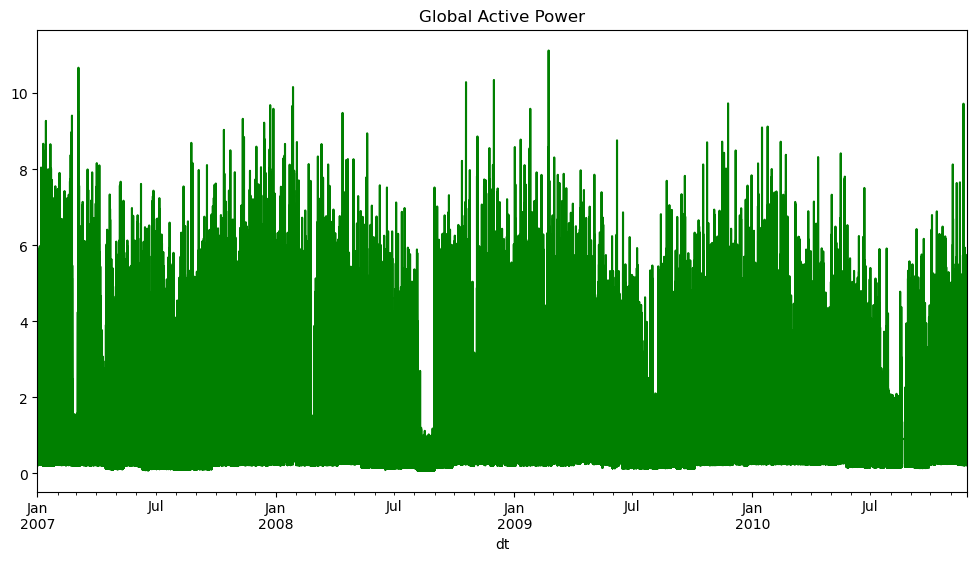

In [49]:
plt.figure(figsize=(12,6))
active_power_df.plot(title='Global Active Power', color='green')
plt.show()

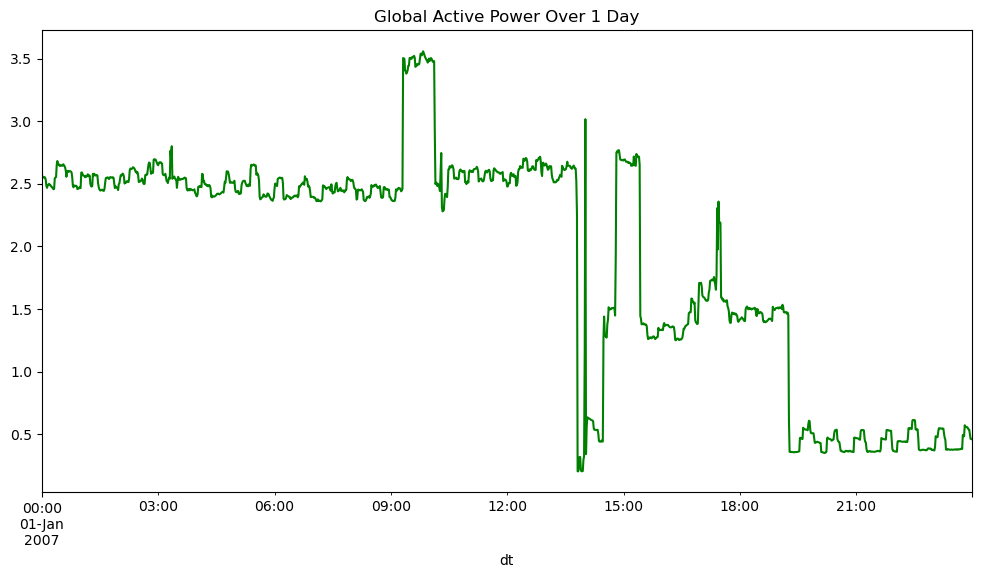

In [50]:
plt.figure(figsize=(12,6))# There are 1440 minutes in a day
active_power_df[0:1440].plot(title='Global Active Power Over 1 Day', color='green')
plt.show()

In [33]:
df_power_consumption = df_data[['power_consumption']]

In [34]:
df_power_consumption.head()

,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333


In [35]:
df_sub_meterings = df_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [36]:
df_sub_meterings.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
2007-01-01,0.0,352.0,5880.0
2007-01-02,0.0,348.0,6562.0
2007-01-03,0.0,344.0,4765.0
2007-01-04,1051.0,7597.0,10896.0
2007-01-05,1483.0,379.0,7602.0


In [37]:
df_active_reactive = df_data[['Global_active_power','Global_reactive_power','Global_intensity']]

In [38]:
df_active_reactive.head()

,Global_active_power,Global_reactive_power,Global_intensity
Date,,,
2007-01-01,2749.004,148.166,11400.4
2007-01-02,1269.236,190.342,5348.2
2007-01-03,1014.054,196.728,4340.2
2007-01-04,3259.412,202.302,13648.6
2007-01-05,2713.364,173.154,11354.6


In [39]:
df_power_consumption.groupby(df_power_consumption.index.year).describe()

power_consumption                                                       \
                 count          mean          std          min          25%   
Date                                                                          
2007             365.0  14316.716530  7141.760475  3969.333333  9122.500000   
2008             366.0  13635.700638  6200.780172  2313.633333  9383.325000   
2009             365.0  12728.079726  4731.511575  3804.100000  9443.333333   
2010             330.0  11980.816061  3963.001990  2064.000000  9201.950000   

                                                
               50%           75%           max  
Date                                            
2007  12678.133333  17471.766667  40280.600000  
2008  13211.400000  17616.600000  38598.966667  
2009  12650.666667  15607.100000  34344.000000  
2010  11767.733333  14607.150000  22103.766667

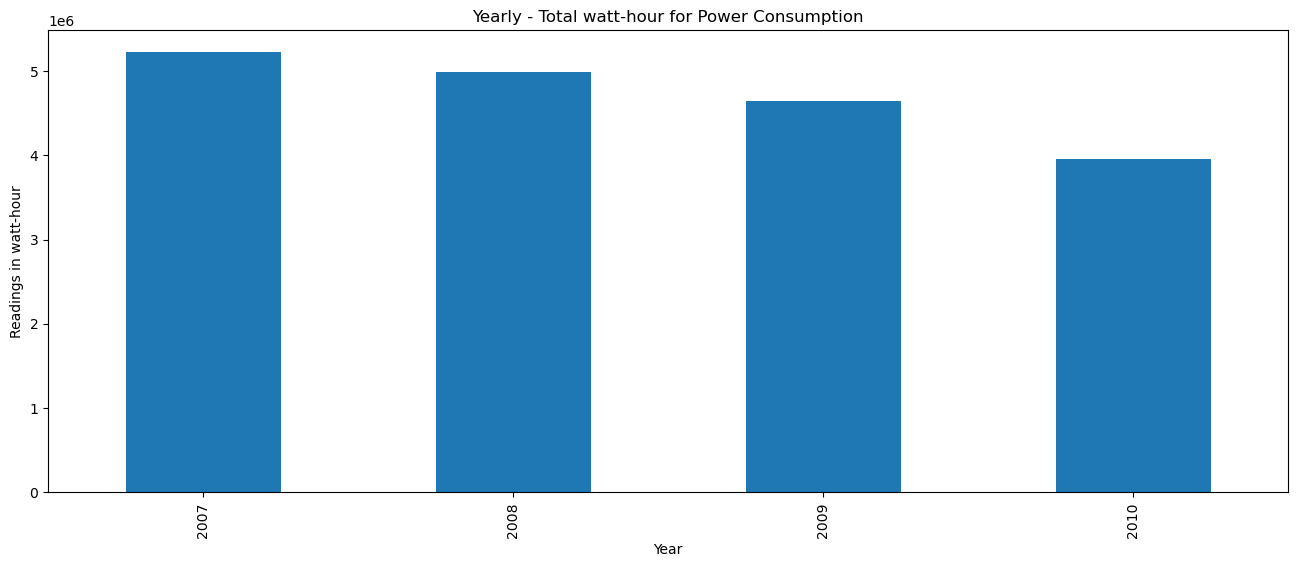

In [40]:
df_power_consumption.groupby(df_power_consumption.index.year)['power_consumption'].sum().plot.bar(xlabel='Year', ylabel='Readings in watt-hour', title='Yearly - Total watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

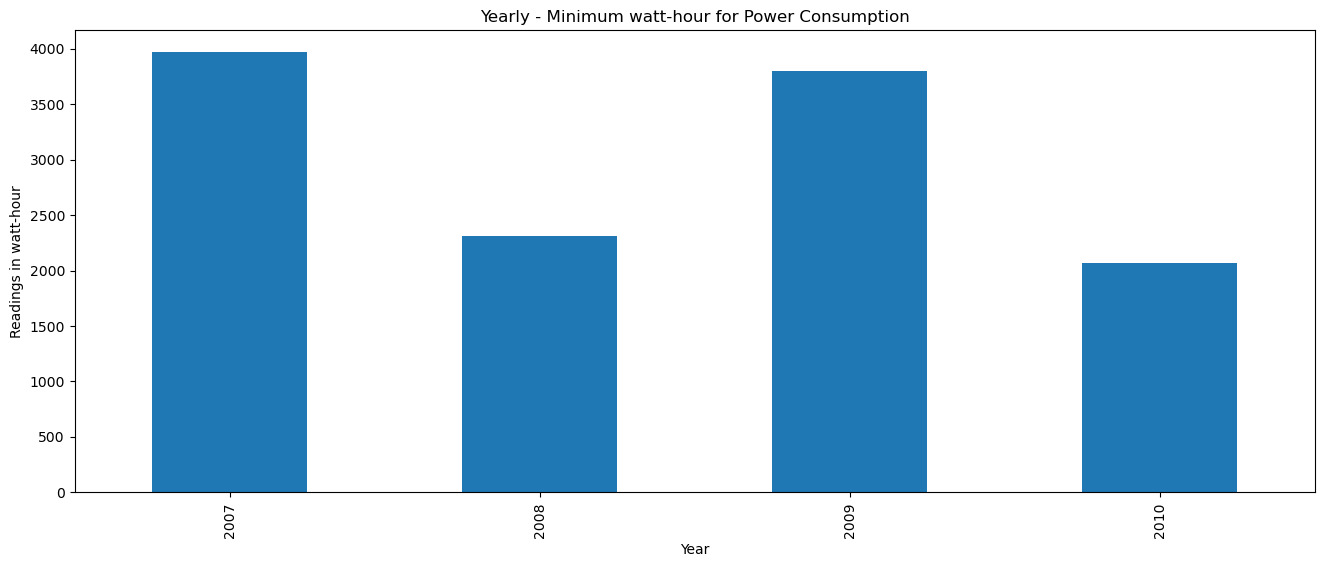

In [41]:
df_power_consumption.groupby(df_power_consumption.index.year)['power_consumption'].min().plot.bar(xlabel='Year', ylabel='Readings in watt-hour', title='Yearly - Minimum watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

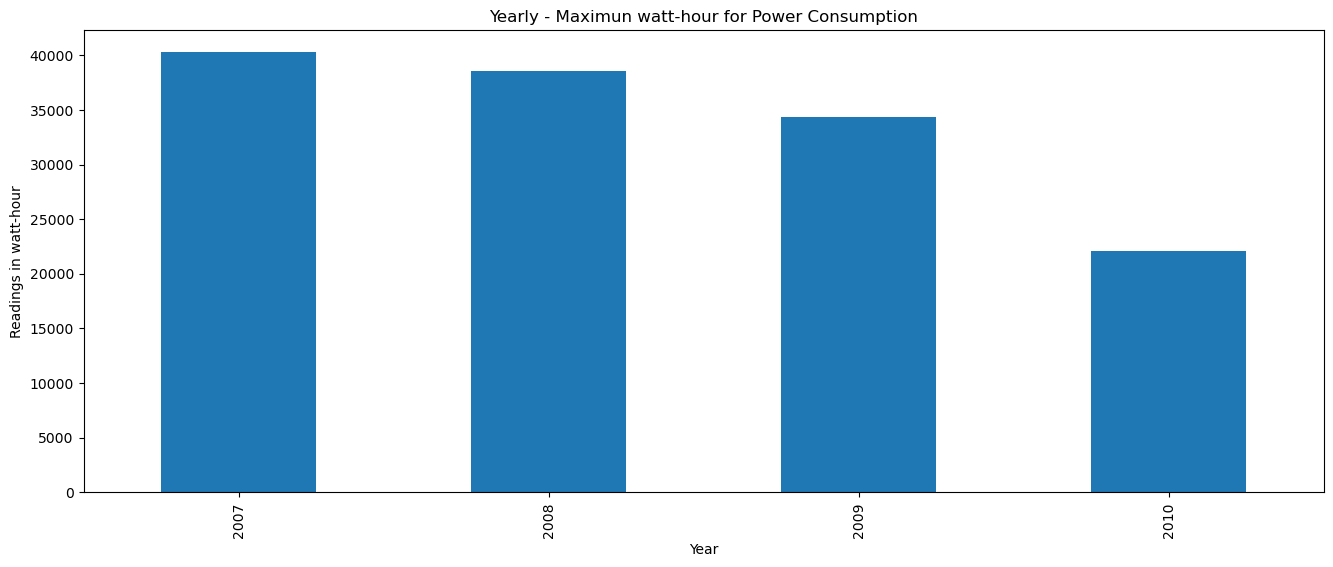

In [42]:
df_power_consumption.groupby(df_power_consumption.index.year)['power_consumption'].max().plot.bar(xlabel='Year', ylabel='Readings in watt-hour', title='Yearly - Maximum watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

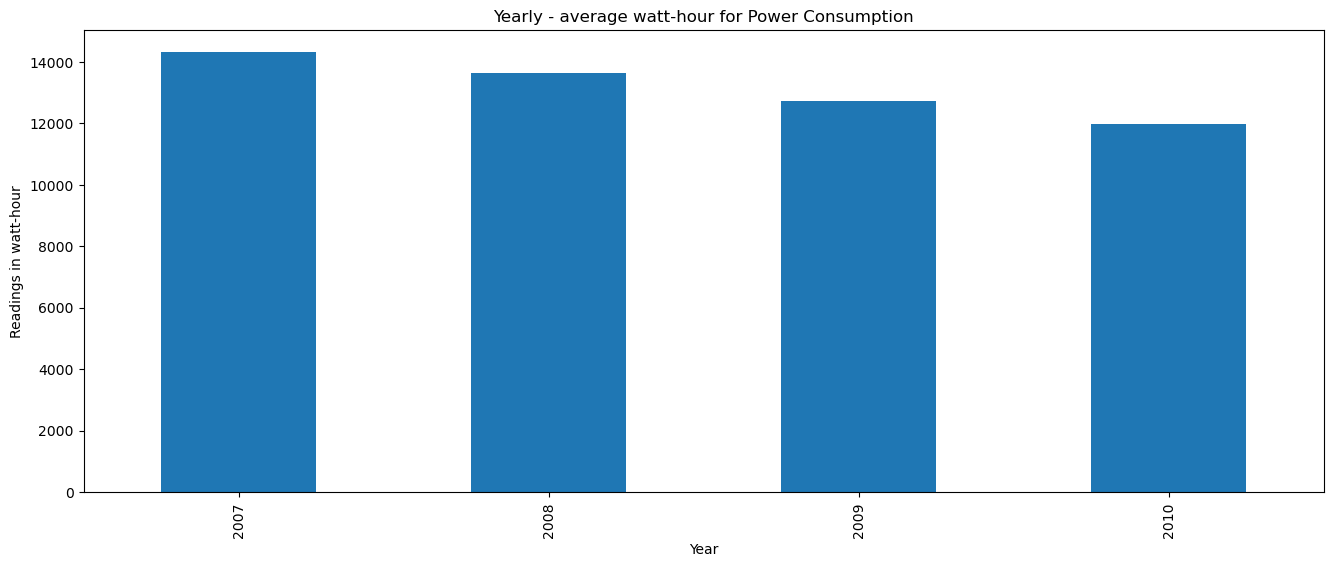

In [43]:
df_power_consumption.groupby(df_power_consumption.index.year)['power_consumption'].mean().plot.bar(xlabel='Year', ylabel='Readings in watt-hour', title='Yearly - average watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

In [44]:
df_power_consumption.groupby(df_power_consumption.index.month).describe()

power_consumption                                                        \
                 count          mean          std          min           25%   
Date                                                                           
1                124.0  19389.707527  5632.641427  6720.000000  15948.433333   
2                113.0  16656.592330  6718.658289  6144.000000  13403.166667   
3                124.0  15266.406989  4916.855611  6285.800000  12980.950000   
4                120.0  12266.414444  3079.319647  6602.766667  10021.841667   
5                124.0  11405.114785  2363.292832  6484.233333  10004.666667   
6                120.0   9150.598611  2174.683766  4771.433333   7661.691667   
7                124.0   8214.546774  2556.130115  3804.100000   6503.558333   
8                124.0   6856.482796  3972.691229  2313.633333   4020.283333   
9                120.0  10624.775833  2558.721033  2064.000000   9201.758333   
10               124.0  14139.170430  3308.166811  6072.466667  12087.275000   
11               116.0  17139.243103  4762.394143  5986.266667  14093.550000   
12                93.0  18996.422939  4912.675357  6556.633333  16474.933333   

                                                
               50%           75%           max  
Date                                            
1     18171.200000  21616.791667  39584.733333  
2     15853.700000  18589.600000  40009.033333  
3     14471.350000  17221.291667  40280.600000  
4     12023.550000  13968.233333  22783.600000  
5     11237.133333  12551.550000  20776.066667  
6      9025.166667  10220.466667  17056.600000  
7      8164.033333   9645.950000  17373.800000  
8      6324.450000   9023.658333  20304.000000  
9     10284.883333  11618.191667  18543.366667  
10    14083.616667  16341.125000  22719.833333  
11    16515.533333  18959.191667  38598.966667  
12    18149.733333  21249.333333  37083.066667

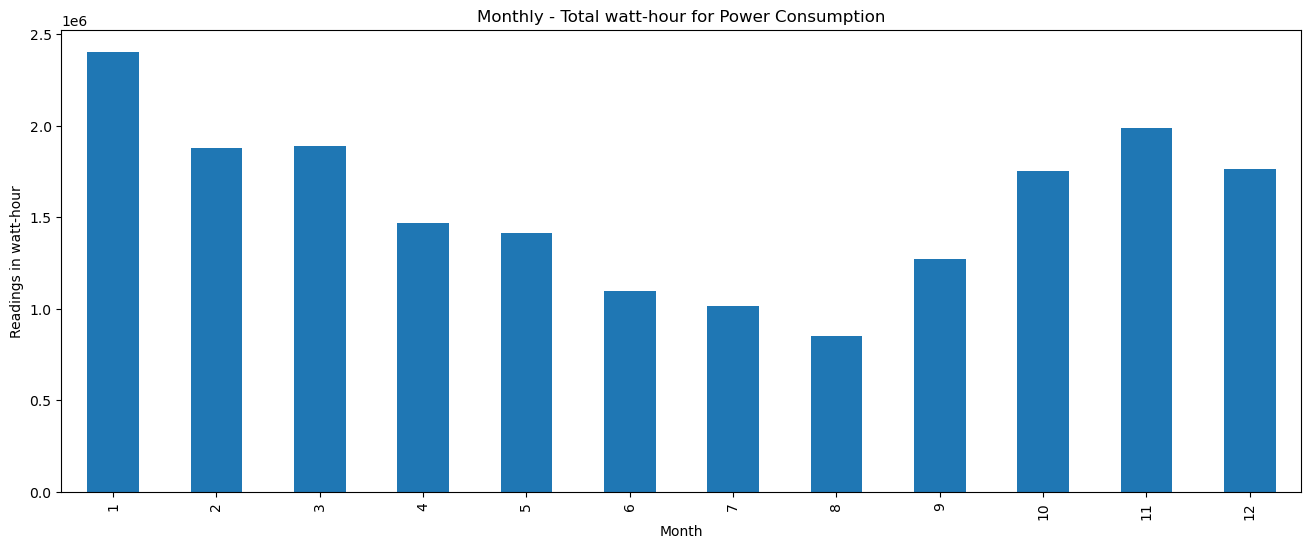

In [45]:
df_power_consumption.groupby(df_power_consumption.index.month)['power_consumption'].sum().plot.bar(xlabel='Month', ylabel='Readings in watt-hour', title='Monthly - Total watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

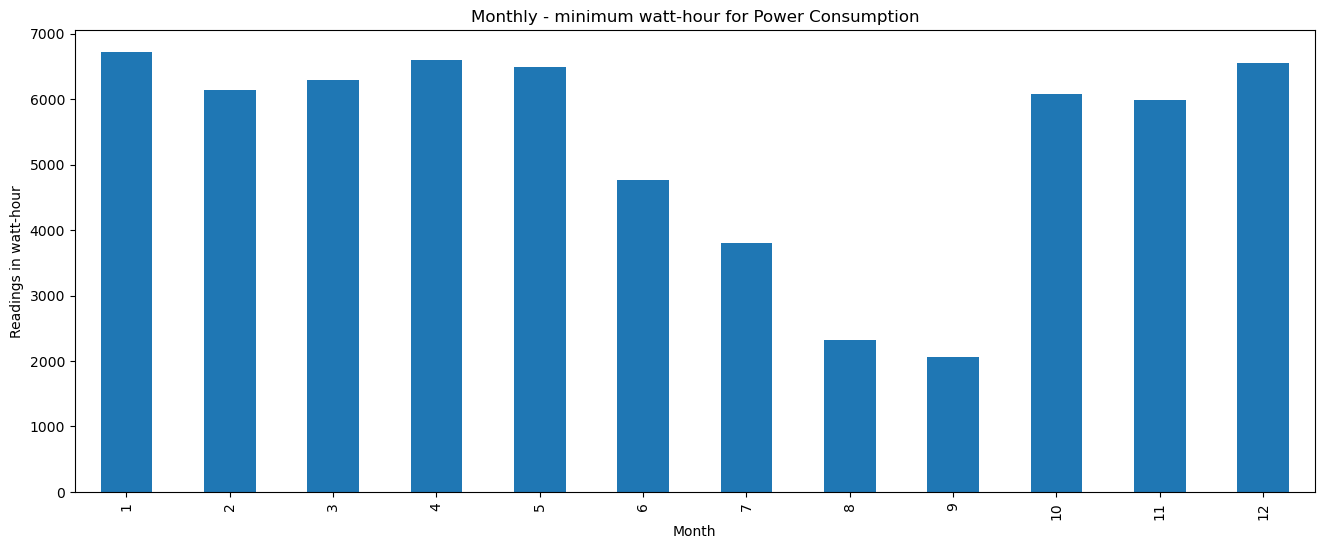

In [46]:
df_power_consumption.groupby(df_power_consumption.index.month)['power_consumption'].min().plot.bar(xlabel='Month', ylabel='Readings in watt-hour', title='Monthly - minimum watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

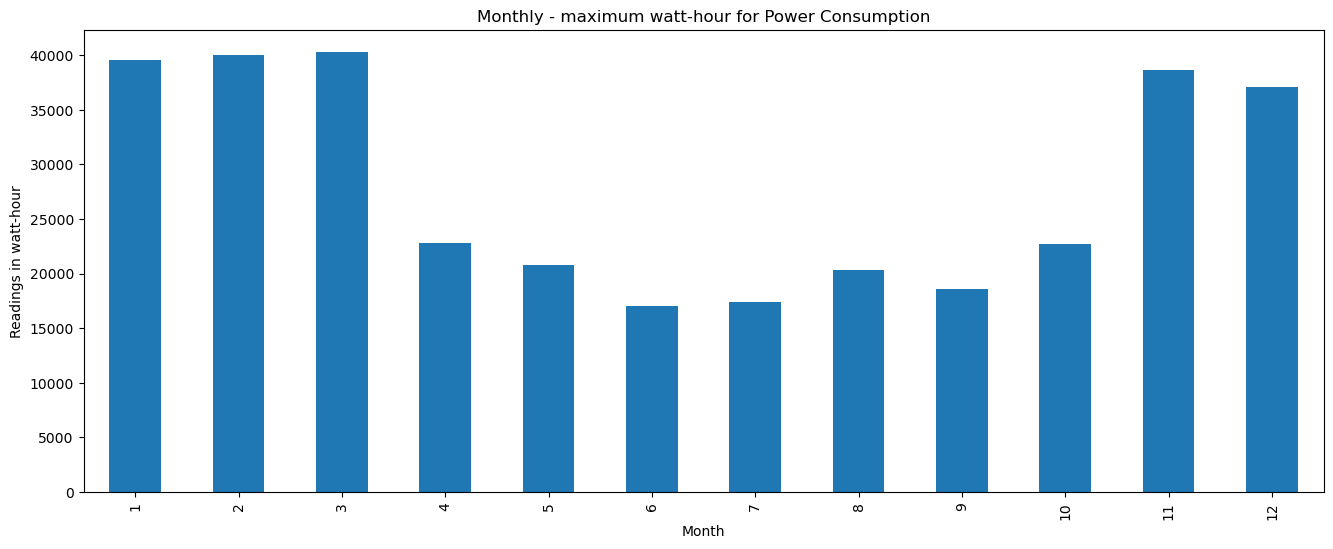

In [47]:
df_power_consumption.groupby(df_power_consumption.index.month)['power_consumption'].max().plot.bar(xlabel='Month', ylabel='Readings in watt-hour', title='Monthly - maximum watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

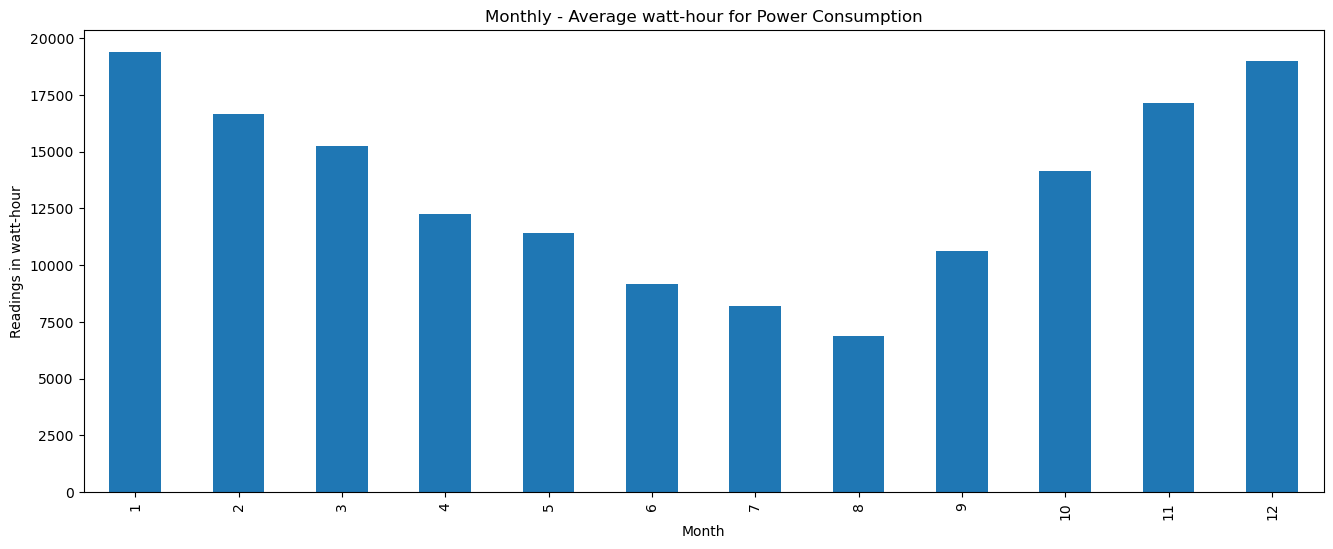

In [48]:
df_power_consumption.groupby(df_power_consumption.index.month)['power_consumption'].mean().plot.bar(xlabel='Month', ylabel='Readings in watt-hour', title='Monthly - Average watt-hour for Power Consumption', figsize=(16, 6))
plt.show()

In [51]:
df_power_consumption.groupby(df_power_consumption.index.quarter).describe()#three-month

power_consumption                                                        \
                 count          mean          std          min           25%   
Date                                                                           
1                361.0  17117.875716  6014.053382  6144.000000  13946.733333   
2                364.0  10945.812637  2874.946492  4771.433333   8970.083333   
3                368.0   8542.882518  3466.502670  2064.000000   6391.125000   
4                333.0  16540.770771  4750.481363  5986.266667  13533.866667   

                                                
               50%           75%           max  
Date                                            
1     16259.566667  18816.733333  40280.600000  
2     10619.500000  12452.841667  22783.600000  
3      8735.116667  10498.633333  20304.000000  
4     16309.100000  18689.800000  38598.966667

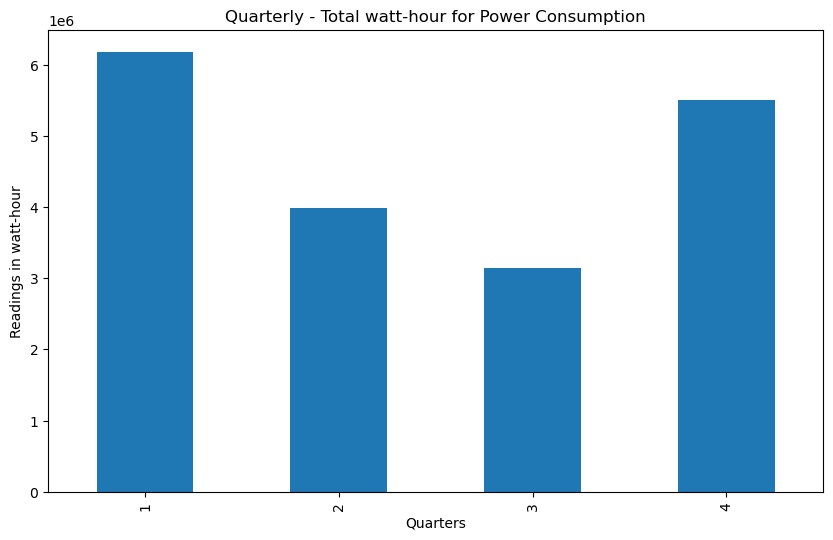

In [54]:
df_power_consumption.groupby(df_power_consumption.index.quarter)['power_consumption'].sum().plot.bar(xlabel='Quarters', ylabel='Readings in watt-hour', title='Quarterly - Total watt-hour for Power Consumption', figsize=(10, 6))
plt.show()

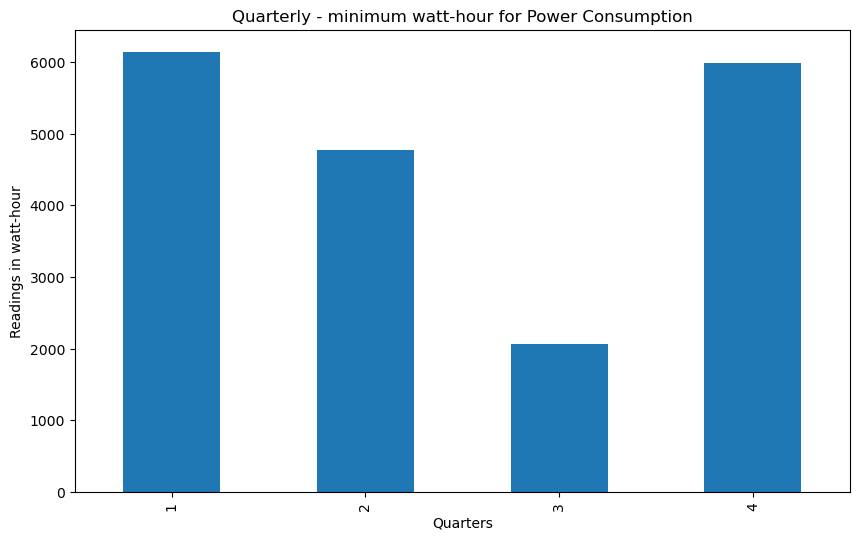

In [55]:
df_power_consumption.groupby(df_power_consumption.index.quarter)['power_consumption'].min().plot.bar(xlabel='Quarters', ylabel='Readings in watt-hour', title='Quarterly - minimum watt-hour for Power Consumption', figsize=(10, 6))
plt.show()

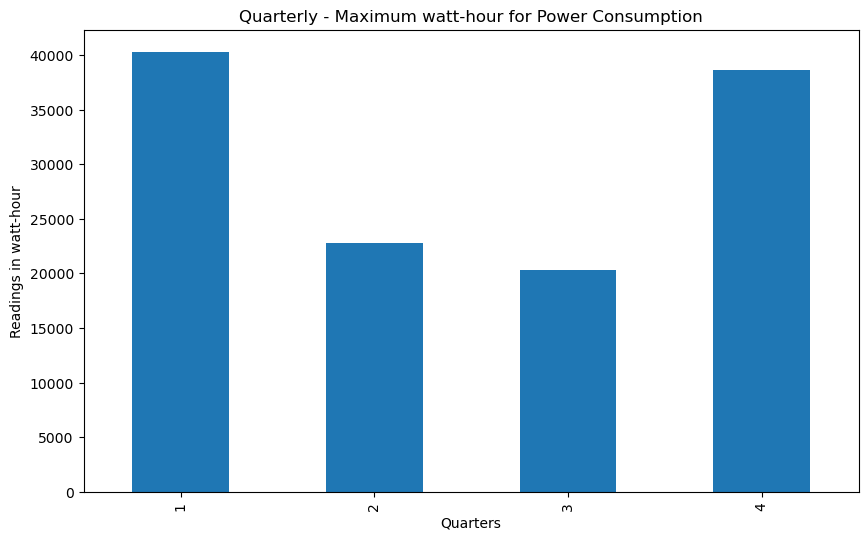

In [56]:
df_power_consumption.groupby(df_power_consumption.index.quarter)['power_consumption'].max().plot.bar(xlabel='Quarters', ylabel='Readings in watt-hour', title='Quarterly - Maximum watt-hour for Power Consumption', figsize=(10, 6))
plt.show()

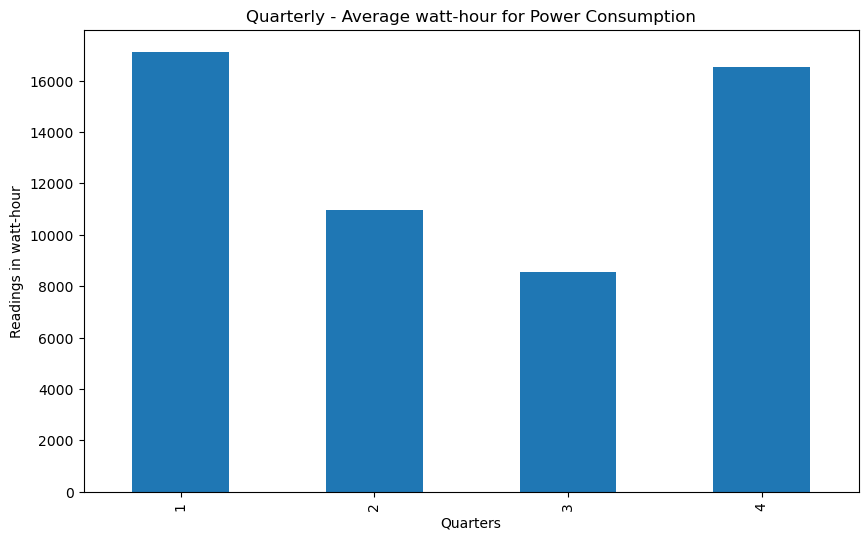

In [57]:
df_power_consumption.groupby(df_power_consumption.index.quarter)['power_consumption'].mean().plot.bar(xlabel='Quarters', ylabel='Readings in watt-hour', title='Quarterly - Average watt-hour for Power Consumption', figsize=(10, 6))
plt.show()

In [59]:
df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).describe()

power_consumption                                                         \
                 count          mean          std           min           25%   
week                                                                            
1                 28.0  19099.398810  7355.551922   6556.633333  15266.000000   
2                 28.0  18386.042857  6002.440172   6720.000000  15402.958333   
3                 28.0  20037.708333  5133.362752  13385.800000  16708.325000   
4                 28.0  19449.571429  5154.058986  12035.600000  16345.741667   
5                 28.0  19948.520238  6411.189152  12128.633333  16068.325000   
6                 28.0  18066.096429  5229.564029  12583.466667  14733.183333   
7                 28.0  17850.182143  4645.027849  13118.600000  15035.550000   
8                 28.0  15346.205952  7356.534789   6373.333333  10247.700000   
9                 28.0  10805.191667  5038.941633   6144.000000   6357.441667   
10                28.0  17202.405952  6152.357217  11141.200000  14242.100000   
11                28.0  15528.629762  2788.160281   7281.800000  14301.341667   
12                28.0  15040.900000  5268.236365  10086.866667  12682.200000   
13                28.0  15350.716667  4182.459543   9967.966667  13242.991667   
14                28.0  13462.947619  2839.476916   8306.833333  11994.050000   
15                28.0  11727.728571  3345.020939   6602.766667   9710.400000   
16                28.0  12496.594048  3045.273213   8071.600000  10617.450000   
17                28.0  10985.417857  2655.459392   7851.300000   9562.958333   
18                28.0  12007.371429  2950.749137   6484.233333  10152.550000   
19                28.0  12307.942857  2623.409065   7057.066667  10803.091667   
20                28.0  11949.691667  1991.812577   8761.633333  10691.866667   
21                28.0  10608.782143  1894.766952   7646.433333   9321.375000   
22                28.0  10214.641667  2161.206526   7238.300000   8700.516667   
23                28.0   9912.807143  1381.395401   7535.000000   8900.925000   
24                28.0   9611.040476  2347.688235   5280.000000   8452.433333   
25                28.0   7794.322619  1387.910325   4771.433333   6758.441667   
26                28.0   9668.314286  2787.727037   6137.033333   7530.708333   
27                28.0   8690.067857  1908.494181   5533.466667   7415.800000   
28                28.0   8752.994048  2378.267353   3908.966667   7708.083333   
29                28.0   8120.941667  2366.039336   3804.100000   6626.483333   
30                28.0   6579.570238  2064.472992   4063.933333   4594.891667   
31                28.0   6308.728571  2457.027127   3986.066667   4351.866667   
32                28.0   5425.935714  2487.527107   2575.666667   3998.200000   
33                28.0   8947.797619  6020.855031   2422.300000   3934.400000   
34                28.0   6782.538095  3171.001299   2318.266667   4956.900000   
35                28.0   8299.744048  3772.857118   2313.633333   6841.783333   
36                28.0   9897.090476  1702.217561   6813.000000   8855.583333   
37                28.0  10009.877381  1632.797948   7284.100000   9014.358333   
38                28.0  10650.986905  3048.645256   2064.000000   9847.758333   
39                28.0  11703.997619  3303.436712   2064.000000   9582.941667   
40                28.0  13265.503571  2670.279946   8499.133333  11339.208333   
41                28.0  14064.028571  2448.840547   8365.900000  12253.258333   
42                28.0  15445.830952  2548.801204  11594.733333  13494.250000   
43                28.0  14508.634524  3720.931487   6351.866667  12015.025000   
44                28.0  12408.021429  4451.167454   5986.266667   9001.708333   
45                28.0  17455.739286  3815.413851  10924.666667  15207.425000   
46                28.0  17490.202381  4138.692916   9731.166667  14578.641667   
47                26.0  17315.543590

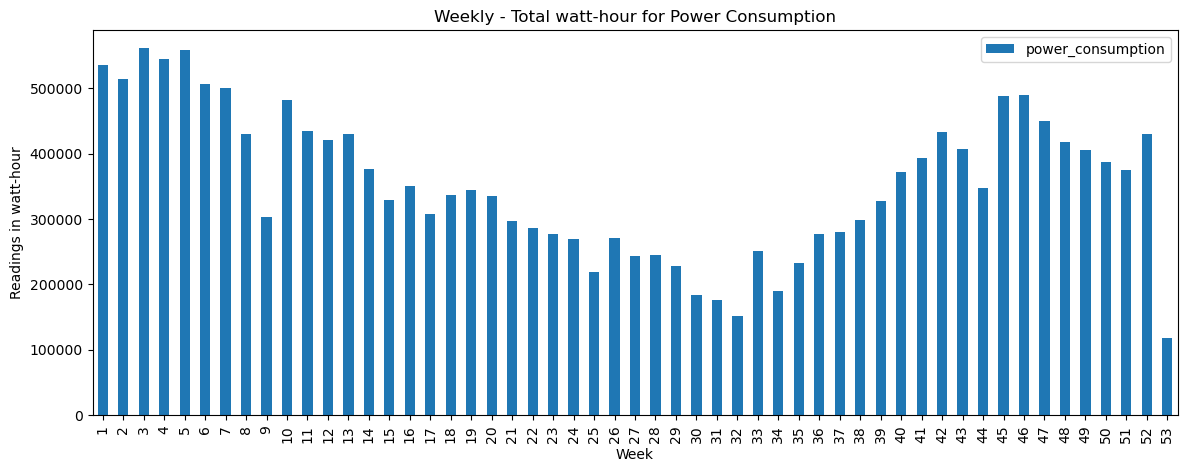

In [63]:
df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).sum().plot.bar(xlabel='Week', ylabel='Readings in watt-hour', title='Weekly - Total watt-hour for Power Consumption', figsize=(14,5))
plt.show()

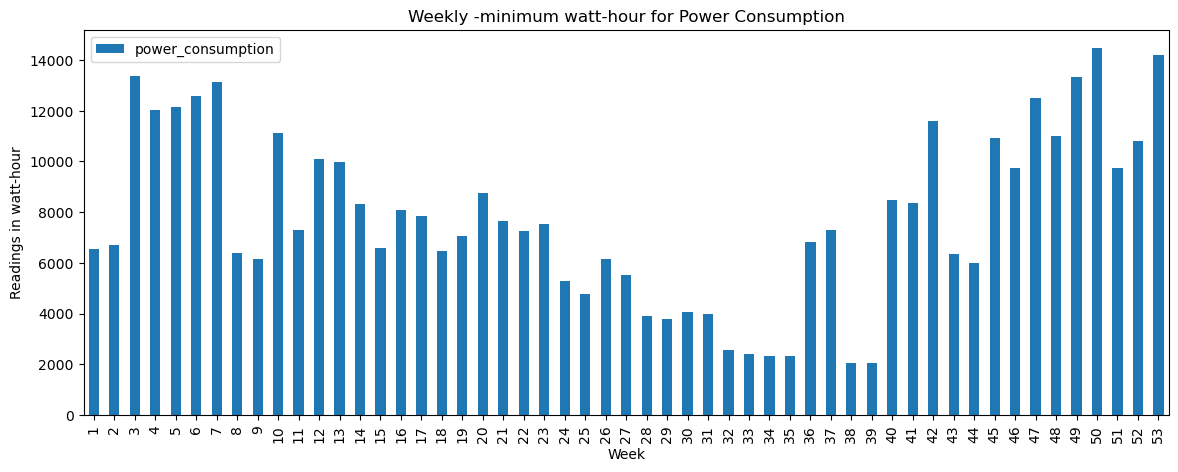

In [64]:
df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).min().plot.bar(xlabel='Week', ylabel='Readings in watt-hour', title='Weekly -minimum watt-hour for Power Consumption', figsize=(14,5))
plt.show()

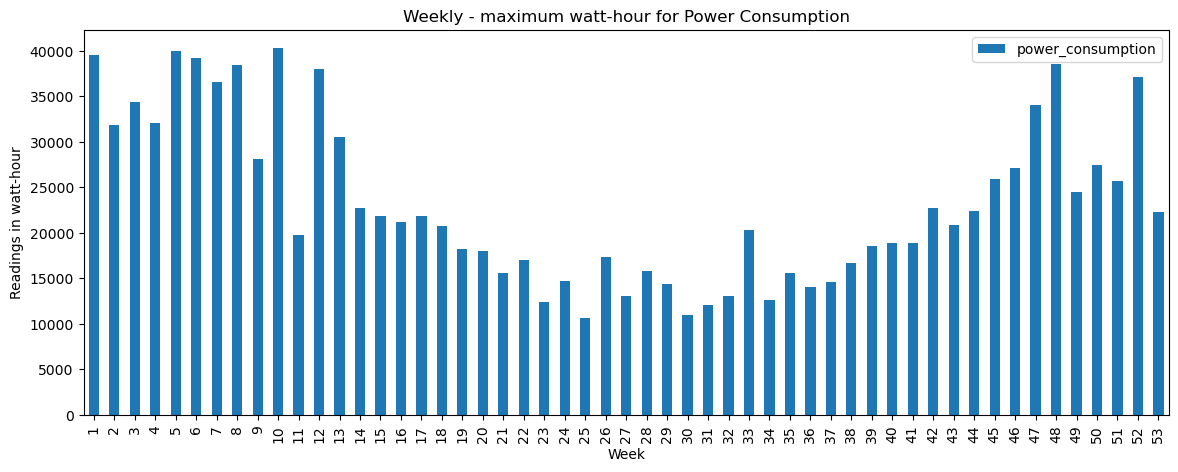

In [65]:
df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).max().plot.bar(xlabel='Week', ylabel='Readings in watt-hour', title='Weekly - maximum watt-hour for Power Consumption', figsize=(14,5))
plt.show()

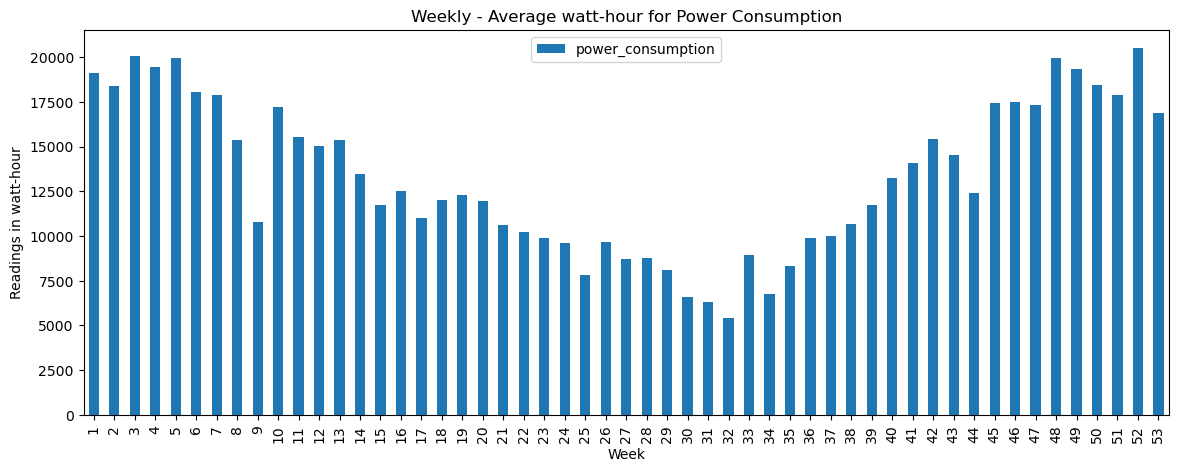

In [66]:
df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).mean().plot.bar(xlabel='Week', ylabel='Readings in watt-hour', title='Weekly - Average watt-hour for Power Consumption', figsize=(14,5))
plt.show()

In [68]:
df_week= df_power_consumption[df_power_consumption.index.isocalendar().week==5]
print(df_week.groupby(df_week.index.year).mean())## analysis of week 5 for all 4 years

      power_consumption
Date                   
2007       23118.457143
2008       21945.776190
2009       19384.133333
2010       15345.714286


In [69]:
df_week= df_power_consumption[df_power_consumption.index.isocalendar().week==5]
print(df_week.groupby(df_week.index.year).min())

      power_consumption
Date                   
2007       15711.666667
2008       17720.533333
2009       15968.500000
2010       12128.633333


In [70]:
df_week= df_power_consumption[df_power_consumption.index.isocalendar().week==5]
print(df_week.groupby(df_week.index.year).max())

      power_consumption
Date                   
2007       40009.033333
2008       25837.400000
2009       25052.200000
2010       20826.433333


In [71]:
df_week= df_power_consumption[df_power_consumption.index.isocalendar().week==5]
print(df_week.groupby(df_week.index.year).sum())

      power_consumption
Date                   
2007      161829.200000
2008      153620.433333
2009      135688.933333
2010      107420.000000


<Axes: title={'center': 'Yearly -total watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

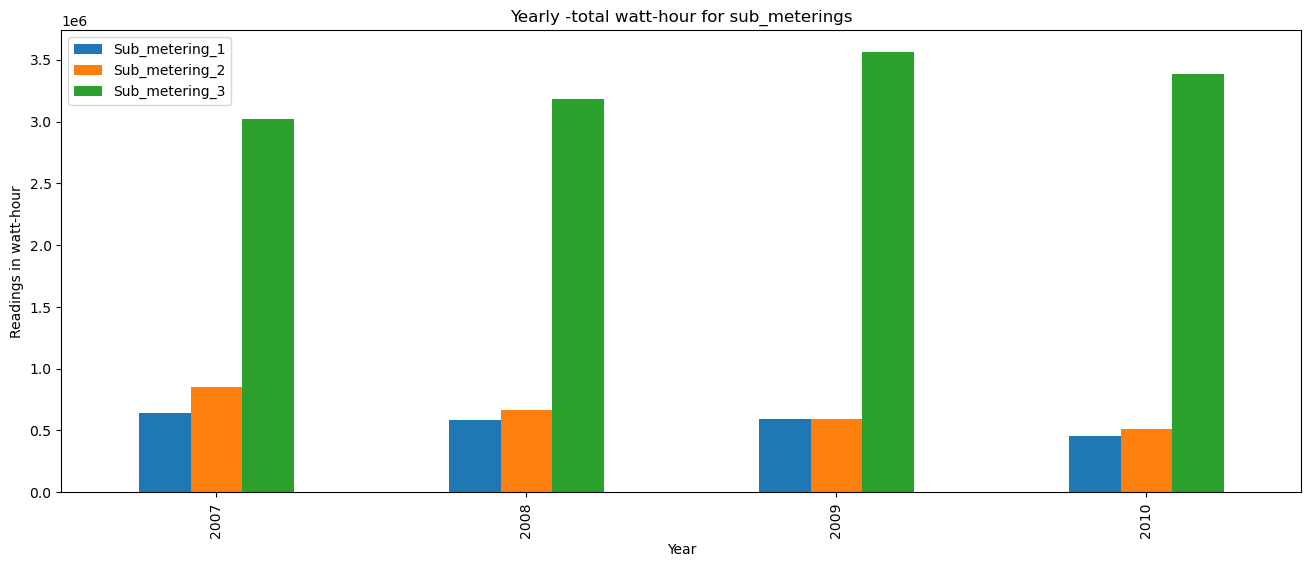

In [73]:
df_sub_meterings.groupby(df_sub_meterings.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly -total watt-hour for sub_meterings",figsize=(16,6))

<Axes: title={'center': 'Yearly -maximum watt-hour for sub_meterings'}, xlabel='Year', ylabel='Readings in watt-hour'>

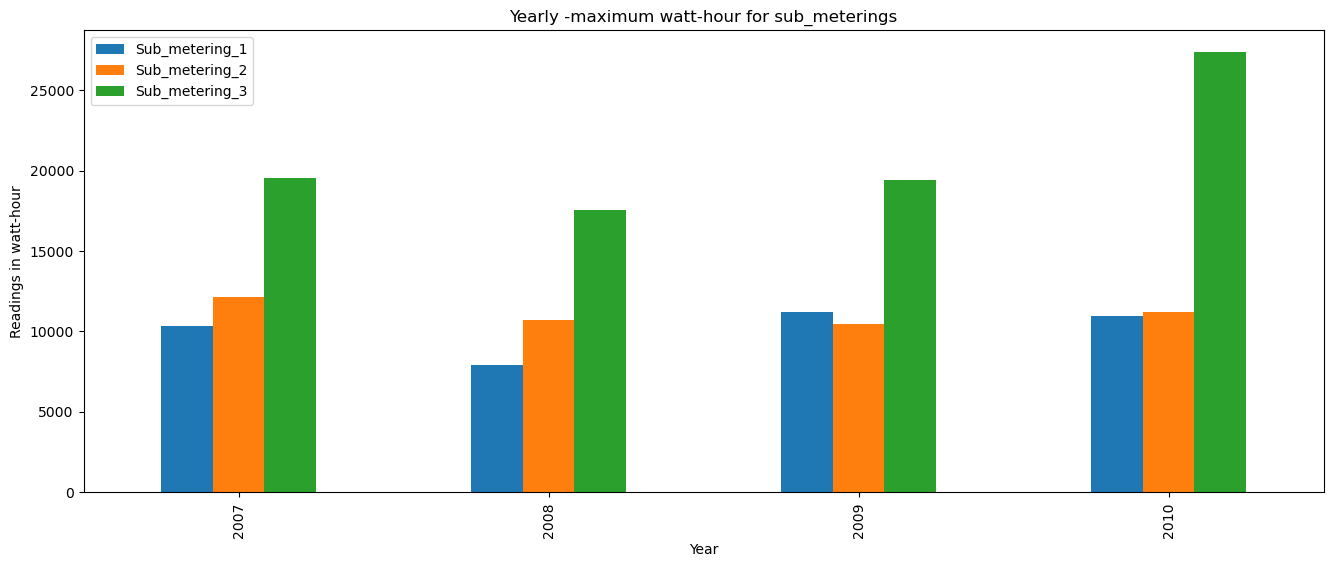

In [74]:
df_sub_meterings.groupby(df_sub_meterings.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly -maximum watt-hour for sub_meterings",figsize=(16,6))

<Axes: title={'center': 'Monthly -average watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

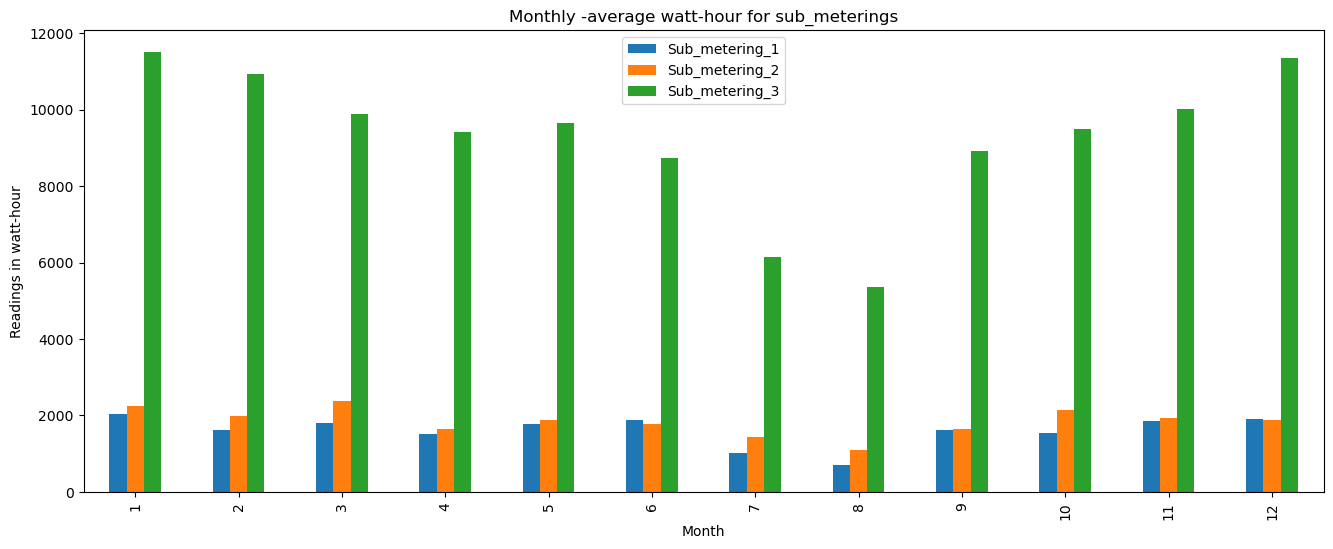

In [80]:
df_sub_meterings.groupby(df_sub_meterings.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly -average watt-hour for sub_meterings",figsize=(16,6))

<Axes: title={'center': 'Monthly - Total watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

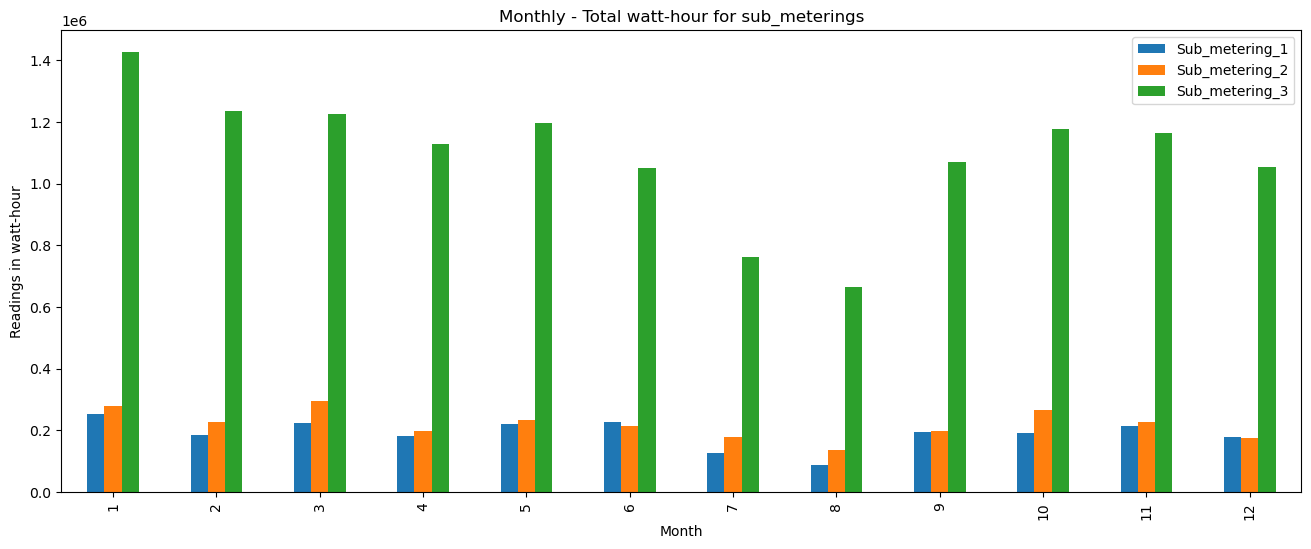

In [77]:
df_sub_meterings.groupby(df_sub_meterings.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for sub_meterings",figsize=(16,6))

<Axes: title={'center': 'Monthly -maximum watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

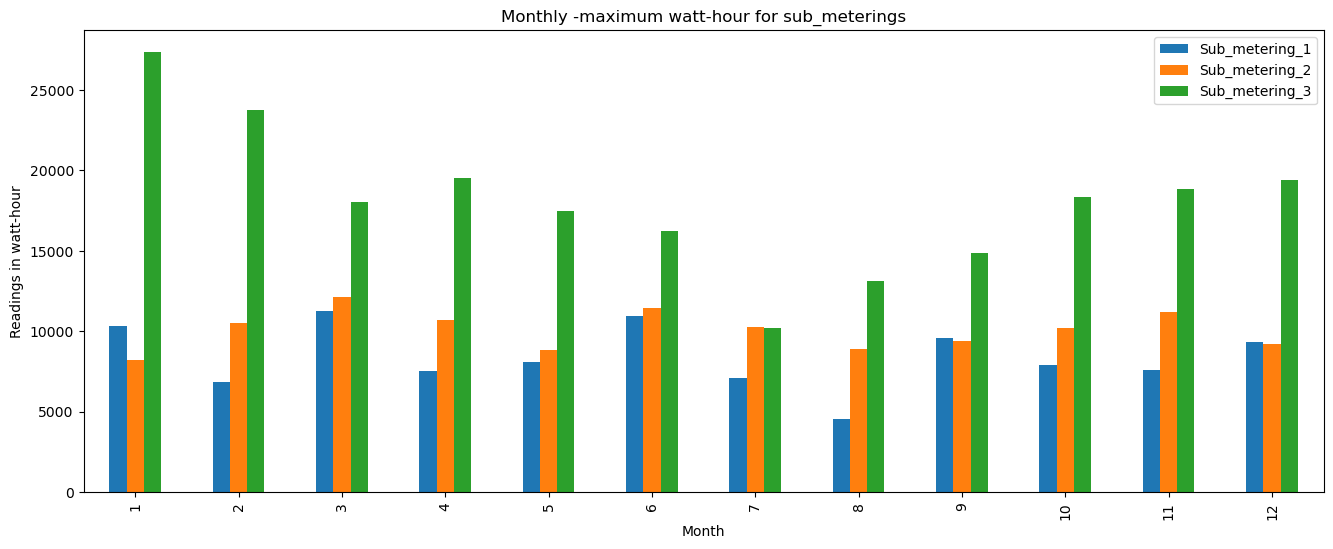

In [79]:
df_sub_meterings.groupby(df_sub_meterings.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly -maximum watt-hour for sub_meterings",figsize=(16,6))

<Axes: title={'center': 'Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

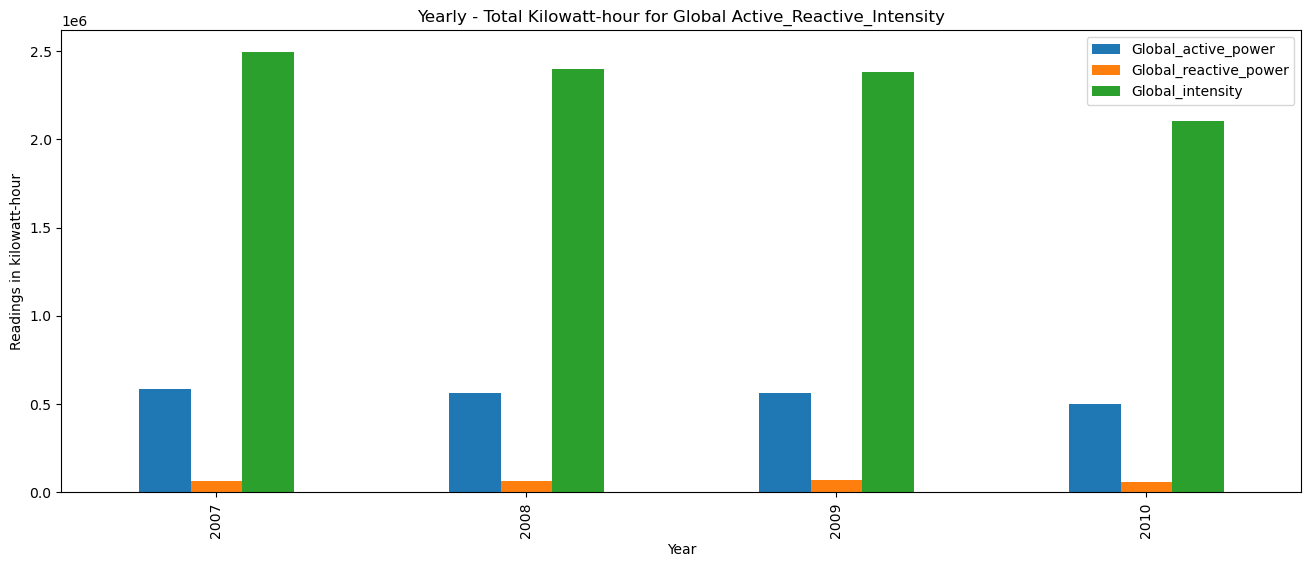

In [81]:
df_active_reactive.groupby(df_active_reactive.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity")

<Axes: title={'center': 'Yearly - Minimum Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

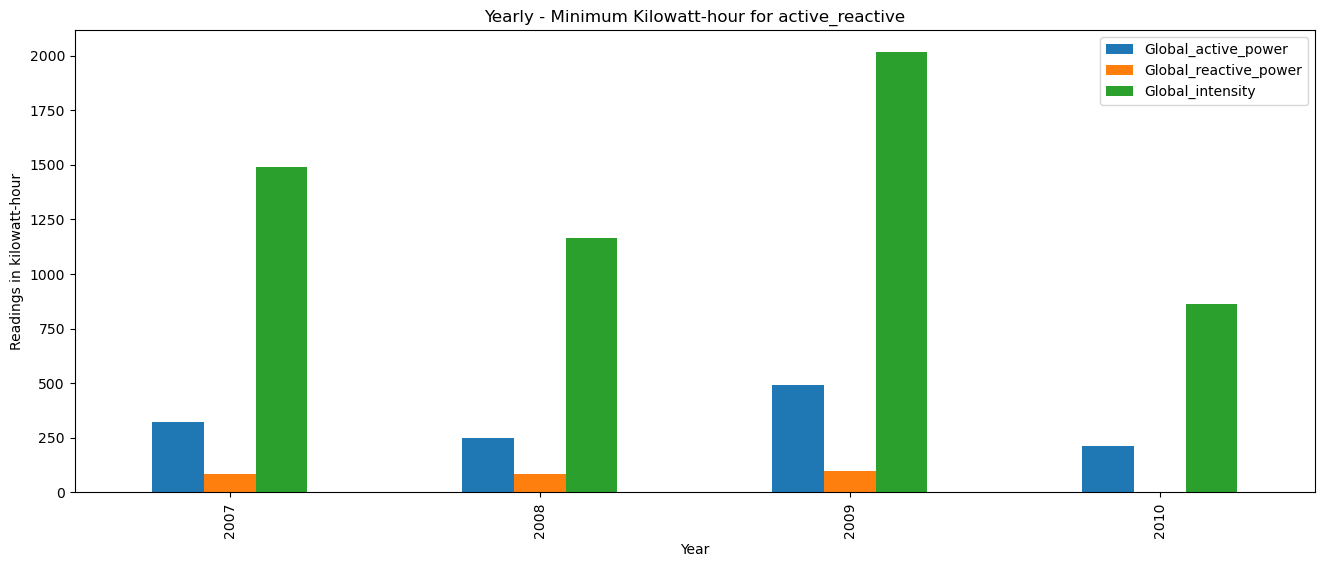

In [82]:
df_active_reactive.groupby(df_active_reactive.index.year).min().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Minimum Kilowatt-hour for active_reactive")

<Axes: title={'center': 'Yearly - Maximum Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

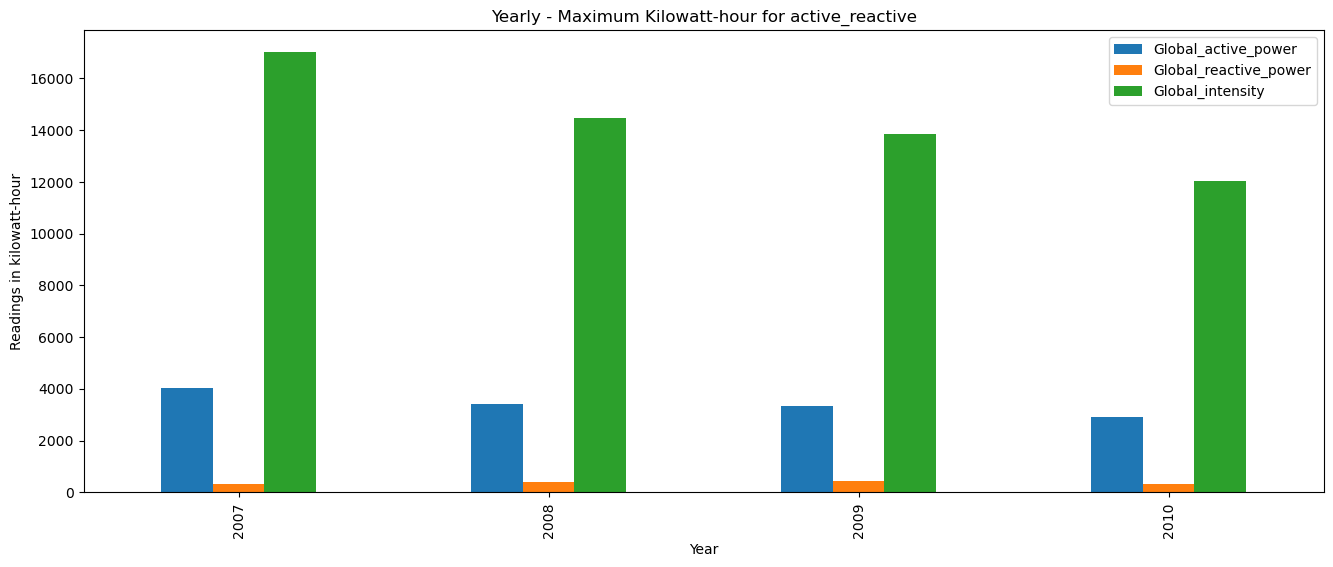

In [83]:
df_active_reactive.groupby(df_active_reactive.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Maximum Kilowatt-hour for active_reactive")

<Axes: title={'center': 'Yearly - Average Kilowatt-hour for active_reactive'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

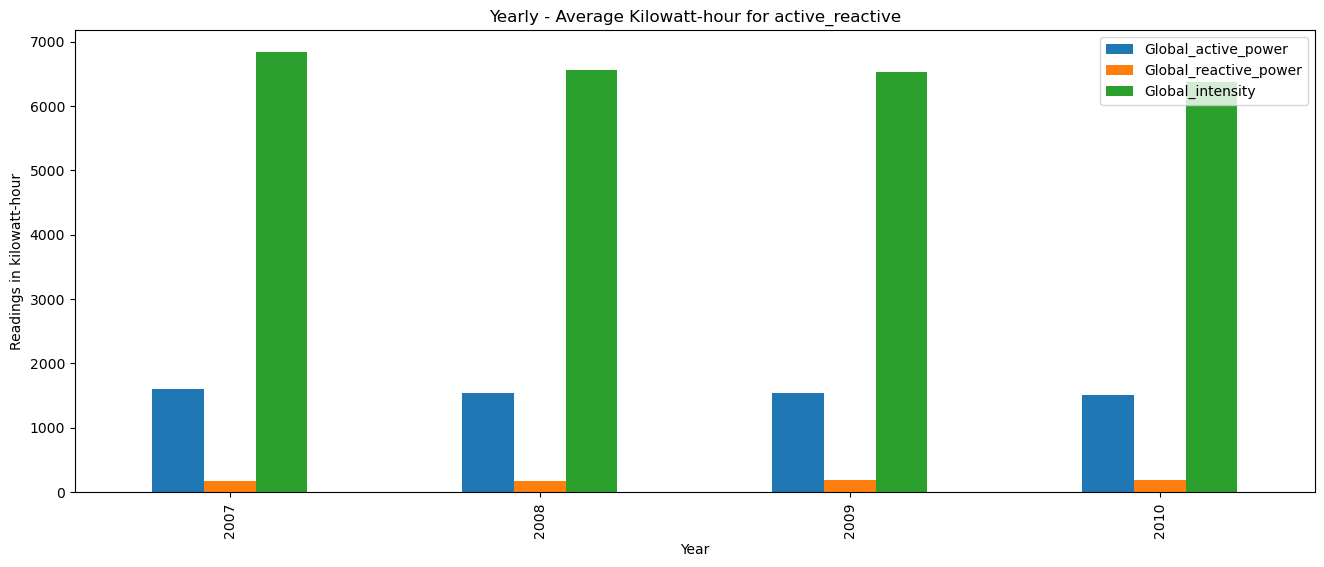

In [84]:
df_active_reactive.groupby(df_active_reactive.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in kilowatt-hour',figsize=(16,6),title="Yearly - Average Kilowatt-hour for active_reactive")

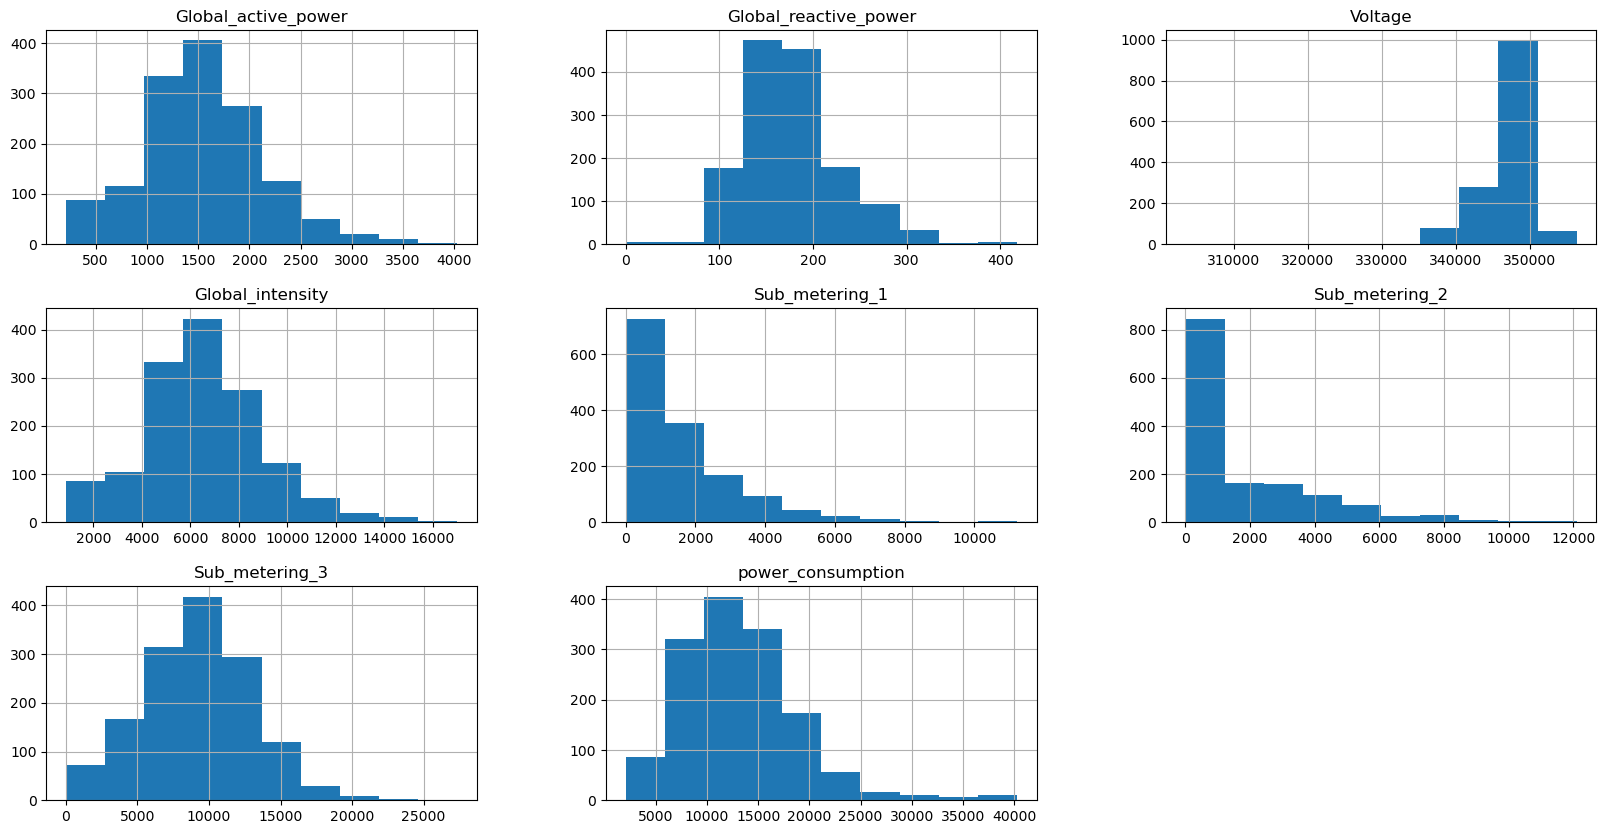

In [85]:
df_data.hist(figsize=(20,10))
plt.show()